<a href="https://colab.research.google.com/github/Luffeboy/Colabstuff/blob/main/Linear_Regression_Lifeexpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Life expectancy

---



The purpose of this assignment is to work with some of the elements from in the End-to-End Project AI/Machine Learning project model. We are interested in predicting Life expectancy with the final model.

We will work with et dataset from Kaggle: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download

### Ensure that we use Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

### Ensure that we use at least Scikit-Learn 1.0.1

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### Let us set up the fonts in mathplotlib

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

### Import important libraries 'numpy' and 'pandas'

In [4]:
import numpy as np
import pandas as pd

# Make reference to life satifaction data file

In [5]:
datafile = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/Life%20Expectancy%20Data%20(WHO).csv"



### Excercise(s):

1.   Try viewing this file in your internet browser




### Load the data file

In [6]:
lifeExp = pd.read_csv(datafile)


### Excercise(s):

1.   Check the `type(...)` of `lifeExp` in a code cell. It is expected to be `DataFrame`. You may find out, what can be done with this class?
2.   Inspect the first 5 intances of the data with the `head()` method



In [12]:
type(lifeExp)
lifeExp.head()

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness1To19Years,Thinness5To9Years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Excercises






1.   We are not satisfied the coloumn identifiers, which will cause problems with Python.
2.   So we rename the indentifiers in the code cell below -> Nothing to be done except from running the code cell below




In [11]:
lifeExp.rename(columns={
    'Life expectancy ':'LifeExpectancy',
    'Adult Mortality':'AdultMortality',
    'Measles ':'Measles',
    'infant deaths':'InfantDeaths',
    'percentage expenditure':'PercentageExpenditure',
    ' BMI ':'BMI' ,
    'Hepatitis B':'HepatitisB',
    'under-five deaths ': 'Under5Deaths',
    'Total expenditure':'TotalExpenditure',
    ' HIV/AIDS':'HIVAIDS',
    ' thinness  1-19 years':'Thinness1To19Years',
    ' thinness 5-9 years':'Thinness5To9Years',
    'Income composition of resources':'IncomeCompositionOfResources',
    'Diphtheria ':'Diphtheria' },  inplace=True)

### Excercises

1.   Now again inspect the first 5 intances of the data with the `head()` method
2.   Inspect the dataset with the `info()` method. Note data types. Are there some data missing?



In [13]:
lifeExp.head()
lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   LifeExpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   InfantDeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   PercentageExpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  Under5Deaths                  2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

### Excercise(s)

1. Make histogram plots om the dataset - e.g. with a code cell that contains som code like this
```
lifeExp.hist(bins=50, figsize=(18, 12))
plt.show()
```
2.   Are all the features nicely bell-shaped? If not leave it for now, because we may do something something about it later, if we are not satisfied with the performance of the model.






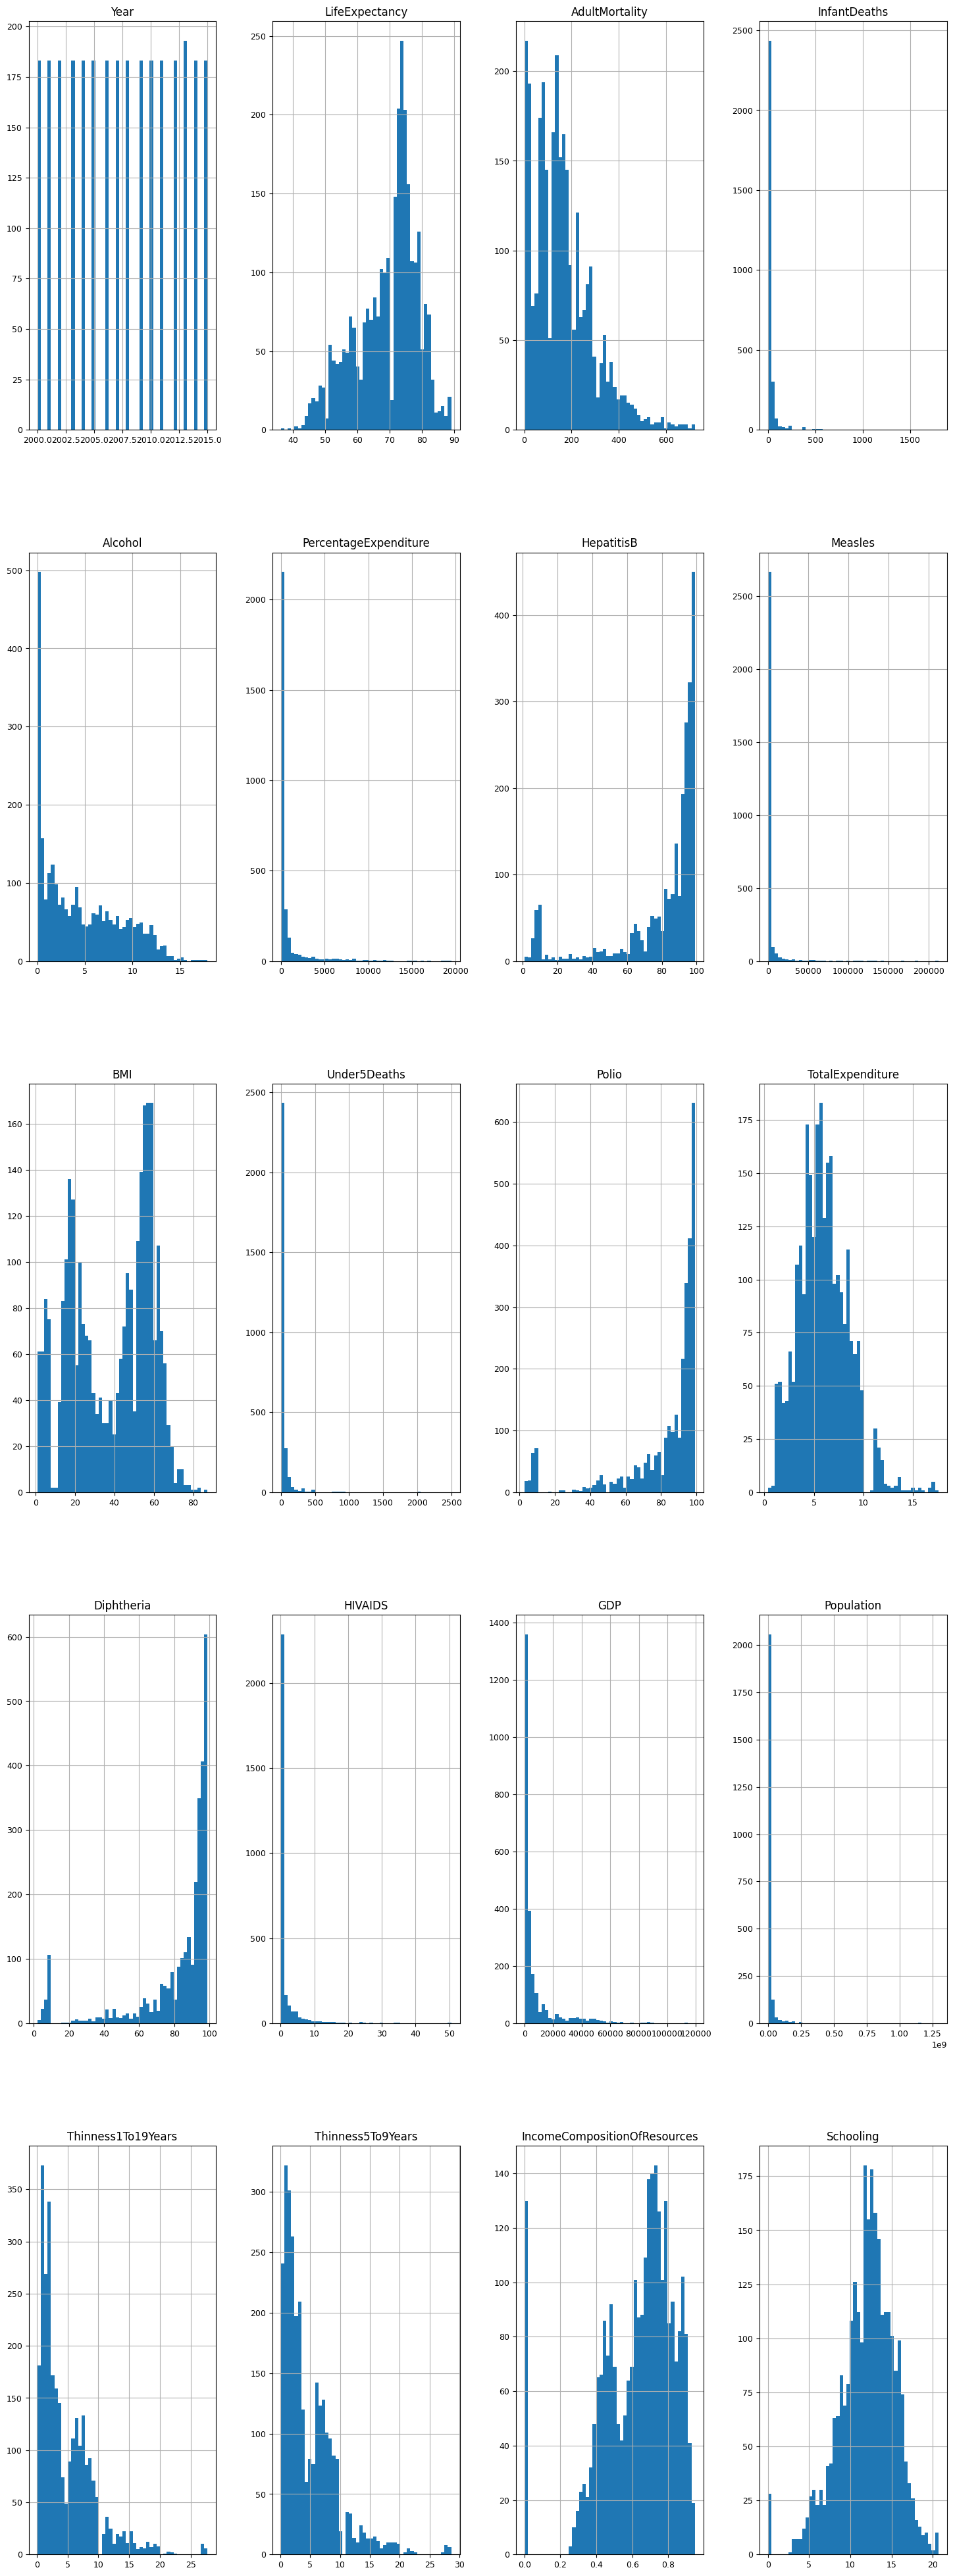

In [14]:
lifeExp.hist(bins = 50, figsize = (18, 50))
plt.show()

### Excercise(s)



1.   Establish the correlations between the features of the dataset. Use a piece of code like this:
```
corr_matrix = lifeExp.corr(numeric_only=True)
```


2.   Focus on "LifeExpectancy" with a piece of code like this
```
corr_matrix["LifeExpectancy"].sort_values(ascending=False)
```
Which the features, that best for predicting "LifeExpectancy" ?





In [16]:
corr_matrix = lifeExp.corr(numeric_only=True)
corr_matrix["LifeExpectancy"].sort_values(ascending=False)

,LifeExpectancy
LifeExpectancy,1.000000
Schooling,0.751975
IncomeCompositionOfResources,0.724776
BMI,0.567694
Diphtheria,0.479495
Polio,0.465556
GDP,0.461455
Alcohol,0.404877
PercentageExpenditure,0.381864
HepatitisB,0.256762


###Excercise(s)

1.   Plot the most promissing features against 'LifeExpectancy' with a piece of code like this:
```
from pandas.plotting import scatter_matrix
promissingFeatures = ['LifeExpectancy', <promissing features>]
scatter_matrix(lifeExp[promissingFeatures], figsize=(18, 12))
plt.show()
```

See anything?

2.   Do something similar with the least promising features.


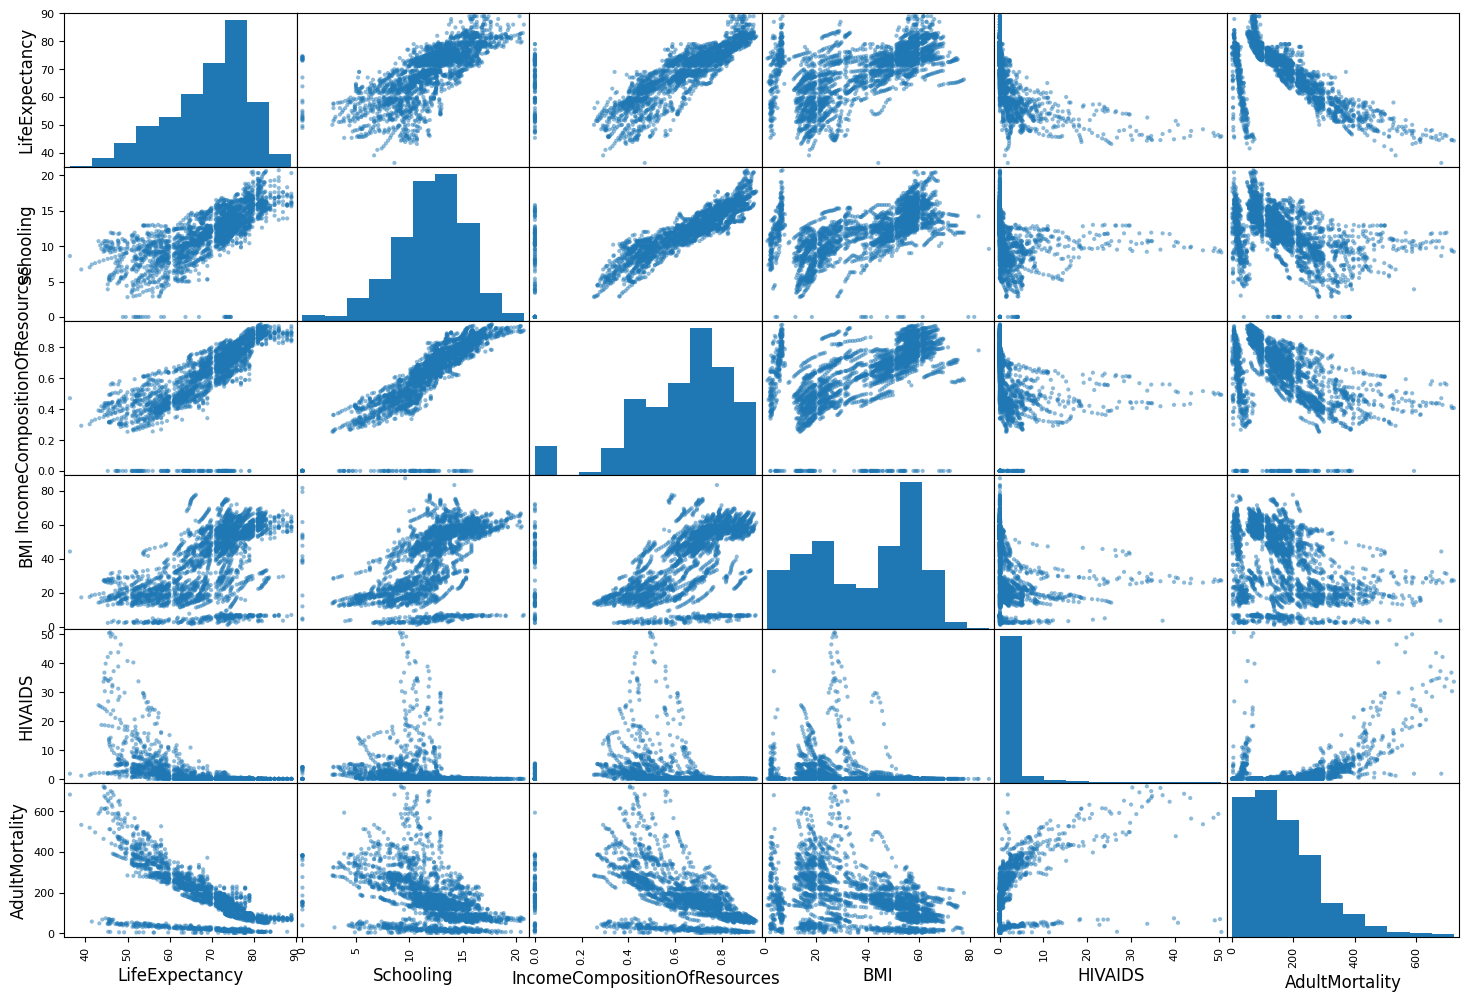

In [38]:
from pandas.plotting import scatter_matrix
promissingFeatures = ['LifeExpectancy', 'Schooling', 'IncomeCompositionOfResources', 'BMI', 'HIVAIDS', 'AdultMortality']
scatter_matrix(lifeExp[promissingFeatures], figsize=(18, 12))
plt.show()

###Excercise(s)

1.   Define a list of not so promissing features to be dropped -> Run the cell below
2.   The extract the list of promissing features, that model are going to learn from, with a code fragment like this:
```
lifeExpLearn=lifeExp.drop(<Features to be dropped>, axis=1)
```
3.   Now check our learning set with `info()` method









In [39]:
featuresToBeDropped={'Country',
                     'Status',
                     'Diphtheria',
                     'Polio',
                     'GDP',
                     'Alcohol',
                     'PercentageExpenditure',
                     'HepatitisB',
                     'TotalExpenditure',
                     'Year',
                     'Population',
                     'Measles',
                     'InfantDeaths',
                     'Under5Deaths',
                     'Thinness5To9Years',
                     'Thinness1To19Years'}

In [42]:
lifeExpLearn=lifeExp.drop(featuresToBeDropped, axis=1)
#lifeExpLearn=lifeExp.drop(['Year', 'AdultMortality', 'InfantDeaths', 'Alcohol', 'PercentageExpenditure', 'HepatitisB', 'Measles', 'Under5Deaths', 'TotalExpenditure', 'HIVAIDS', 'Population', 'Thinness1To19Years', 'Thinness5To9Years'], axis=1)

In [43]:
lifeExpLearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LifeExpectancy                2928 non-null   float64
 1   AdultMortality                2928 non-null   float64
 2   BMI                           2904 non-null   float64
 3   HIVAIDS                       2938 non-null   float64
 4   IncomeCompositionOfResources  2771 non-null   float64
 5   Schooling                     2775 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB


###Excercise(s)

It should appearent that some values are still missing. We are now going to fix this with the `SimpleImputer` class:

1.   Import the `SimpleImputer` class with a statement like this, because we believe that the median value is the best replacement:
```
imputer = SimpleImputer(strategy="median")
```

2.   'Fit' the with our learning set - e.g.:
```
imputer.fit(lifeExpLearn)
```

3.   Make the actual replacement with a piece of code like this:
```
transformation=imputer.transform(lifeExpLearn)
```

4.   Note the `type()` of `transformation`

5.   Re-combine our `transformation` into a `Dataframe` - like this:
```
lifeExpLearnCleaned = pd.DataFrame(transformation, columns=lifeExpLearn.columns,index=lifeExpLearn.index)
```

6.   Now check missing values - e.g.
```
lifeExpLearnCleaned.info()
```
Any thing missing now?









In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(lifeExpLearn)
transformation=imputer.transform(lifeExpLearn)
lifeExpLearnCleaned = pd.DataFrame(transformation, columns=lifeExpLearn.columns,index=lifeExpLearn.index)
lifeExpLearnCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LifeExpectancy                2938 non-null   float64
 1   AdultMortality                2938 non-null   float64
 2   BMI                           2938 non-null   float64
 3   HIVAIDS                       2938 non-null   float64
 4   IncomeCompositionOfResources  2938 non-null   float64
 5   Schooling                     2938 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB


### Excercise(s)

1.   Go on with the `LinearRegression` as you did in a previous assignment. You may extract input for it like this:
```
X_features = lifeExpLearnCleaned.drop("LifeExpectancy", axis=1)
y_labels = lifeExpLearnCleaned["LifeExpectancy"].values
```






In [48]:
X_features = lifeExpLearnCleaned.drop("LifeExpectancy", axis=1)
y_labels = lifeExpLearnCleaned["LifeExpectancy"].values